<a href="https://colab.research.google.com/github/Erick930107/Titanic-survival-prediction/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

In [ ]:
print(train_data.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

In [ ]:
print(train_data.shape)

(891, 12)


In [ ]:
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


0    549
1    342
Name: Survived, dtype: int64


<Axes: ylabel='count'>

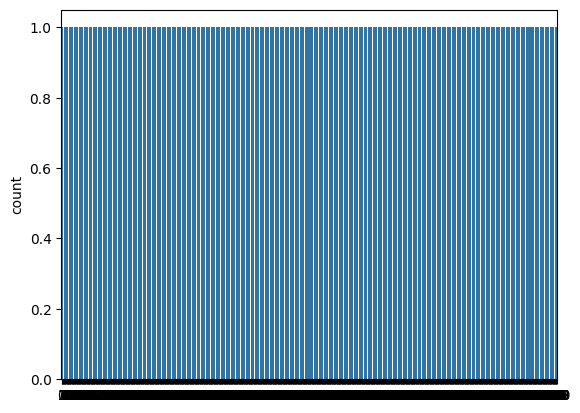

In [ ]:
print(train_data['Survived'].value_counts())
sns.countplot(train_data['Survived'])

ValueError: The following variable cannot be assigned with wide-form data: `hue`

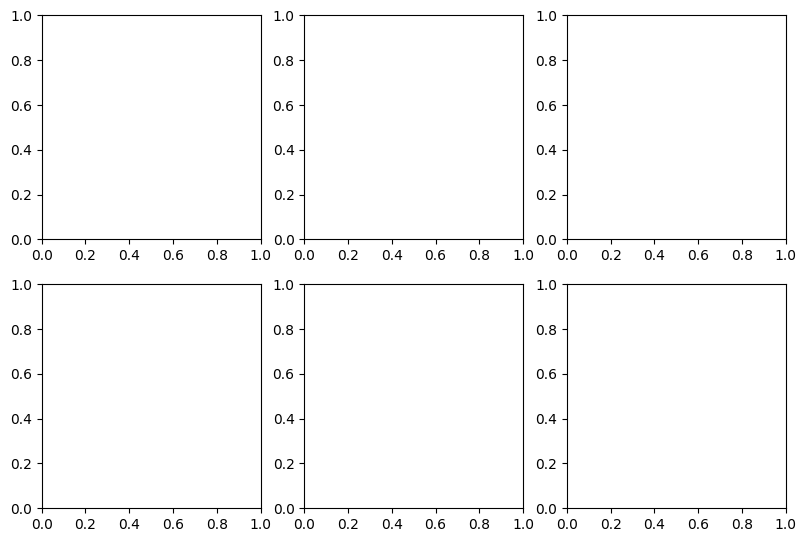

In [ ]:
cols = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

n_rows = 2
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols * 3.2, n_rows * 3.2))

for r in range(n_rows):
    for c in range(n_cols):
        i = r * n_cols + c
        if i < 5:
            ax = axs[r][c]
            sns.countplot(train_data[cols[i]], hue = train_data['Survived'], ax = ax)
            ax.set_title(cols[i])
            ax.legend(title = 'Survived', loc = 'upper right')
plt.tight_layout()

In [ ]:
train_data.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
train_data.pivot_table('Survived',index = 'Sex', columns = 'Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
age = pd.cut(train_data['Age'],[0, 18, 80])
train_data.pivot_table('Survived',['Sex',age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [ ]:
train_data.pivot_table('Survived',index = 'Sex', columns = 'Parch')

Parch,0,1,2,3,4,5,6
Sex,,,,,,,
female,0.788660,0.766667,0.612245,0.75,0.0,0.25,0.0
male,0.165289,0.327586,0.322581,0.00,0.0,0.00,NaN


In [ ]:
print(train_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

train_data = train_data.drop(['Cabin','Name','PassengerId'], axis = 1)
train_data = train_data.drop(['Ticket'] , axis =1 )

train_data = train_data.dropna(subset =  ['Embarked','Age'])

In [ ]:
df = pd.DataFrame(np.arange(12).reshape(3, 4), columns = ['A', 'B', 'C', 'D'])
print(df)

   A  B   C   D
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11


In [ ]:
df = df.drop(['B', 'C'], axis = 1)
print(df)

   A   D
0  0   3
1  4   7
2  8  11


In [ ]:
print(train_data.shape)
print()
print(train_data.dtypes)

(712, 8)

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


In [ ]:
print(train_data['Sex'].unique())
print(train_data['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train_data.iloc[:, 2] = label_encoder.fit_transform(train_data.iloc[:, 2].values)
train_data.iloc[:, 7] = label_encoder.fit_transform(train_data.iloc[:, 7].values)

<ipython-input-27-37e1289ad4ad>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train_data.iloc[:, 2] = label_encoder.fit_transform(train_data.iloc[:, 2].values)
<ipython-input-27-37e1289ad4ad>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train_data.iloc[:, 7] = label_encoder.fit_transform(train_data.iloc[:, 7].values)


In [ ]:
print(train_data['Sex'].unique())
print(train_data['Embarked'].unique())

[1 0]
[2 0 1]


In [ ]:
X = train_data.iloc[:, 1:8].values     #乘客資訊
y = train_data.iloc[:, 0].values       #是否存活

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
def models(X_train, y_train):

    # Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, y_train)

    # KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors= 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, y_train)

    # SVC (linear kernal)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state = 0)
    svc_lin.fit(X_train,y_train)

    # SVC (RBF kernal)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state = 0)
    svc_rbf.fit(X_train,y_train)

    # GaussianNBr
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)

    # Dicision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, y_train)

    # RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train,y_train)

    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
    print('[1]K Neighbors  Training Accuracy:', knn.score(X_train, y_train))
    print('[2]SVC Linear Training Accuracy:', svc_lin.score(X_train, y_train))
    print('[3]SVC RBF Training Accuracy:', svc_rbf.score(X_train, y_train))
    print('[4]Gaussian NB Training Accuracy:', gauss.score(X_train, y_train))
    print('[5]Decision Tree Training Accuracy:', tree.score(X_train, y_train))
    print('[6]Random Forest Training Accuracy:', forest.score(X_train, y_train))
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [ ]:
model = models(X_train, y_train)

[0]Logistic Regression Training Accuracy: 0.7978910369068541
[1]K Neighbors  Training Accuracy: 0.8664323374340949
[2]SVC Linear Training Accuracy: 0.7768014059753954
[3]SVC RBF Training Accuracy: 0.8506151142355008
[4]Gaussian NB Training Accuracy: 0.8031634446397188
[5]Decision Tree Training Accuracy: 0.9929701230228472
[6]Random Forest Training Accuracy: 0.9753954305799648


In [ ]:
from sklearn.metrics import confusion_matrix

for i in range (len(model)):
    cm = confusion_matrix(y_test, model[i].predict(X_test))

    TN, FP, FN, TP = cm.ravel()
    test_score = (TP + TN) / (TN + TP + FP + FN)

    print(cm)
    print('Model[{}] Testing Accuracy = "{}"'.format(i, test_score))
    print()

[[73  9]
 [18 43]]
Model[0] Testing Accuracy = "0.8111888111888111"

[[71 11]
 [20 41]]
Model[1] Testing Accuracy = "0.7832167832167832"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902"

[[75  7]
 [22 39]]
Model[3] Testing Accuracy = "0.7972027972027972"

[[69 13]
 [23 38]]
Model[4] Testing Accuracy = "0.7482517482517482"

[[60 22]
 [10 51]]
Model[5] Testing Accuracy = "0.7762237762237763"

[[67 15]
 [13 48]]
Model[6] Testing Accuracy = "0.8041958041958042"



<Axes: xlabel='feature'>

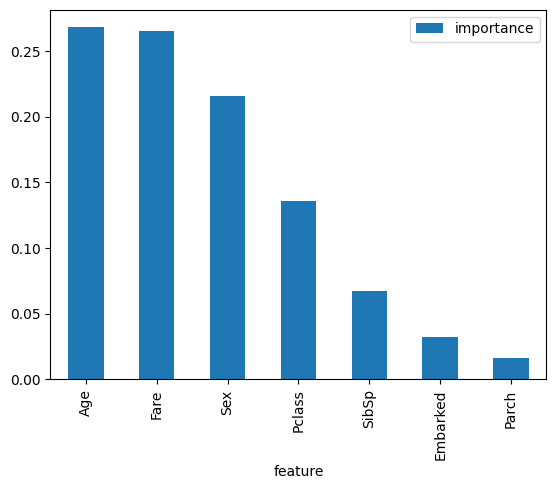

In [ ]:
decisionTree = model[5]
importances = pd.DataFrame({'feature': train_data.iloc[:, 1:8].columns, 'importance': np.round(decisionTree.feature_importances_, 3)} )
importances = importances.sort_values('importance', ascending = False).set_index('feature')

importances.plot.bar()